In [ ]:
!pip install allantools

In [ ]:
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import allantools 

In [ ]:
#gives access to data saved on google drive
from google.colab import drive
drive.mount("/gdrive")

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
path_template = "/content/{}-Coupled 1.csv"

In [ ]:
def create_dfs(nums):
    result = []
    for d in nums:
        path = path_template.format(d)
        df = pd.read_csv(path)
        df.columns = ["Sensor", "Laser"]
        result.append(df)
    return result 

In [ ]:
dfs = create_dfs([4, 5, 6, 7, 8, 9, 10])

In [ ]:
combined = dfs[0]

In [ ]:
for i in dfs[1:-1]:
    combined = combined.append(i)

In [ ]:
len(combined)

81473268

In [ ]:
#combined.to_csv("Coupled_2_through_10.csv")

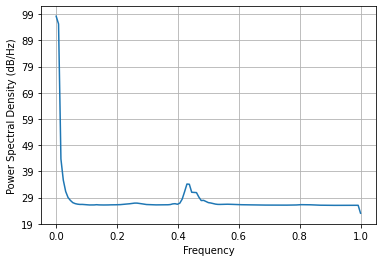

In [ ]:
psd, freq = plt.psd(combined["Sensor"])

In [ ]:
t, a, _, _ = allantools.adev(data=combined["Sensor"], rate=1/(10e-6))
a = np.sqrt(a)

In [ ]:
#generate reference slope lines

x = np.arange(10e-7, len(t))

##slope -1/2
y1 = np.power(x, -0.5)

##slope 0
y2 = np.ones_like(x)

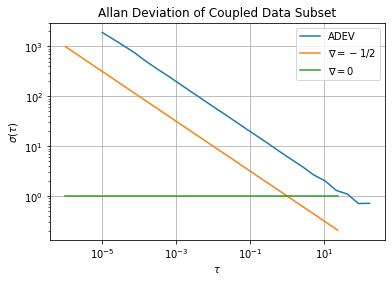

In [ ]:
plt.loglog(t, a, label="ADEV")
plt.loglog(x, y1, label="$\\nabla=-1/2$")
plt.loglog(x, y2, label="$\\nabla=0$")
plt.title("Allan Deviation of Coupled Data Subset")
plt.ylabel("$\sigma(\\tau)$")
plt.xlabel("$\\tau$")
plt.grid(b=True)
plt.legend()
plt.show()

In [ ]:
plt.plot(np.arange(0, len(combined["Sensor"])), combined["Sensor"], ',')
plt.title("Combined Stationary IMU Data")

Text(0.5, 1.0, 'Combined Stationary IMU Data')

In [ ]:
plt.savefig("Stationary IMU.png")